# Problem Statement
- It is difficult for a business to survive without analyzing the competition
- As being a data analyst, I am tasked to analyze the competition for better results
- Provided dataset has information for market capitalization of top 500 companies in India

## Importing the necessary libraries

In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Load the dataset into dataframe

In [210]:
df = pd.read_csv('Financial Analytics data.csv')

In [211]:
df.shape

(488, 5)


## Dataset Features Summary

### Name
- **Description**: Represents the names of various companies.
- **Importance**: Identifies the companies included in the dataset.

### Market Capitalization (Mar Cap - Crore)
- **Description**: Total value of a company's outstanding shares of stock(Its actually the current share price multiplied by the total number of outstanding shares).
- **Importance**: Indicates the size and importance of a company in the market.

### Sales for the Quarter (Sales Qtr - Crore)
- **Description**: Total sales revenue generated by each company in a specific quarter.
- **Importance**: Reflects the company's ability to generate income from its core operations.

### Key Insights:
- **Market Position**: Market capitalization provides insight into the relative size and importance of each company in the market.
- **Financial Performance**: Sales revenue indicates the effectiveness of each company's sales efforts and overall financial health.
- **Comparison Opportunities**: Comparing market capitalization and sales revenue across companies allows for benchmarking and identification of market leaders, laggards, and potential investment opportunities.



In [212]:
df.head()
# df.tail()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


<strong>Summary statistics  </strong>

In [214]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


<strong> Here as we can see that the Unnamed column is not empty it contains relevant values and those are obviously from " Sales Qtr - Crore " (count =365 + 94 = 459) so we got to move those values and drop the unnamed column. </strong>

In [215]:
df['Sales Qtr - Crore'].fillna(df.iloc[:, -1], inplace = True)

In [216]:
df.rename(columns = {"Mar Cap - Crore" : "Market Capital(in Cr)", "Sales Qtr - Crore": "Quarterly Sales(in Cr)"}, inplace = True)

In [217]:
df.describe()

,S.No.,Market Capital(in Cr),Quarterly Sales(in Cr),Unnamed: 4
count,488.000000,479.000000,459.000000,94.000000
mean,251.508197,28043.857119,3807.789412,1523.870106
std,145.884078,59464.615831,9989.449987,1800.008836
min,1.000000,3017.070000,0.000000,0.000000
25%,122.750000,4843.575000,534.910000,407.167500
50%,252.500000,9885.050000,1137.170000,702.325000
75%,378.250000,23549.900000,2730.195000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


<strong>Now We can drop this unnecessary unnamed column and the S.No. too.</strong>

In [218]:
df.drop(columns = df.columns[[0,-1]], axis = 1, inplace = True)

In [219]:
df.head()

,Name,Market Capital(in Cr),Quarterly Sales(in Cr)
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51


<strong>Lets work on Duplicated and missing values </strong>

In [220]:
print("Duplicate values : ", df.duplicated().sum())

Duplicate values :  0


Nice ! There are no duplicated values 

In [221]:
# Missing values 

print("Missing values in the dataset :")
print(df.isnull().sum())

Missing values in the dataset :
Name                       0
Market Capital(in Cr)      9
Quarterly Sales(in Cr)    29
dtype: int64


In [222]:
df.dropna(inplace = True)

In [223]:
df.isnull().sum()

Name                      0
Market Capital(in Cr)     0
Quarterly Sales(in Cr)    0
dtype: int64

# `Final Dataset`

In [224]:
df.head(10)

,Name,Market Capital(in Cr),Quarterly Sales(in Cr)
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51
5,Hind. Unilever,288265.26,8590.00
6,Maruti Suzuki,263493.81,19283.20
7,Infosys,248320.35,17794.00
8,O N G C,239981.50,22995.88
9,St Bk of India,232763.33,57014.08


In [225]:
df.describe()

,Market Capital(in Cr),Quarterly Sales(in Cr)
count,459.000000,459.000000
mean,28870.974139,3807.789412
std,60557.081792,9989.449987
min,3017.070000,0.000000
25%,4942.815000,534.910000
50%,10442.090000,1137.170000
75%,24707.320000,2730.195000
max,583436.720000,110666.930000


# `Analysis`

### Correlation 

In [226]:
corr_matrix = df.corr()
corr_matrix

,Market Capital(in Cr),Quarterly Sales(in Cr)
Market Capital(in Cr),1.000000,0.624409
Quarterly Sales(in Cr),0.624409,1.000000


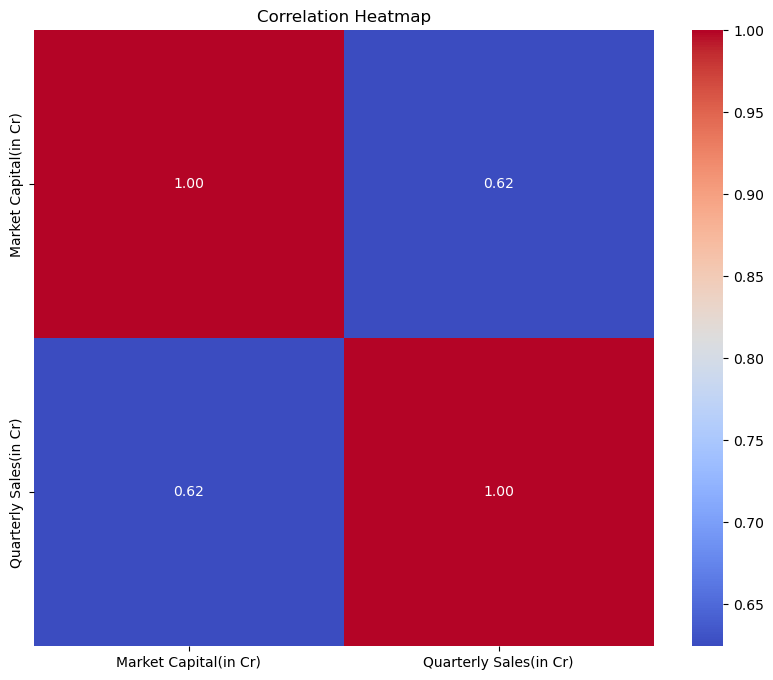

In [227]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Inference**
- We can see there is positive correlation of 0.62 between Sales for quarter and Market Capital showing dependency on each other.

In [228]:
# Calculate key metrics
df['Market Cap to Sales Ratio'] = df['Market Capital(in Cr)'] / df['Quarterly Sales(in Cr)']
# df['Profit Margin'] = (df['Quarterly Sales(in Cr)'] - df['Market Capital(in Cr)']) / df['Quarterly Sales(in Cr)']

In [229]:

# Display the calculated metrics
df[['Name', 'Market Cap to Sales Ratio']].head(10)



,Name,Market Cap to Sales Ratio
0,Reliance Inds.,5.845474
1,TCS,18.240676
2,HDFC Bank,23.465685
3,ITC,32.847382
4,H D F C,17.190535
5,Hind. Unilever,33.558237
6,Maruti Suzuki,13.664423
7,Infosys,13.955285
8,O N G C,10.435848
9,St Bk of India,4.082559


`A low Market Cap to Sales Ratio may suggest that the company's sales are undervalued relative to its market capitalization, while a high ratio may indicate overvaluation.`

In [230]:
df_sorted_ratio = df.sort_values(by='Market Cap to Sales Ratio', ascending=False)
df_sorted_ratio

,Name,Market Capital(in Cr),Quarterly Sales(in Cr),Market Cap to Sales Ratio
393,Ujjivan Fin.Ser.,4293.42,0.00,inf
228,SPARC,10755.13,19.42,553.817199
95,Bajaj Holdings,30305.94,317.85,95.346673
382,Tata Inv.Corpn.,4401.66,47.02,93.612505
373,Indian Energy Ex,4595.70,64.75,70.976062
...,...,...,...,...
444,Oriental Bank,3674.60,4262.08,0.862161
441,Corporation Bank,3716.46,4387.85,0.846989
334,C P C L,5427.82,8587.17,0.632085
122,Rajesh Exports,23495.54,41304.84,0.568833


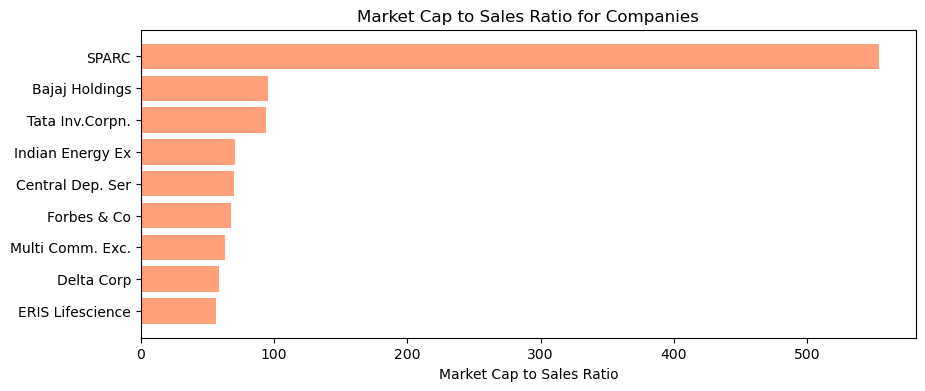

In [231]:

# Plot Market Cap to Sales Ratio
plt.figure(figsize=(10, 4))
plt.barh(df_sorted_ratio['Name'][:10], df_sorted_ratio['Market Cap to Sales Ratio'][:10], color='#FFA07A')
plt.xlabel('Market Cap to Sales Ratio')
plt.title('Market Cap to Sales Ratio for Companies')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top
plt.show()

Outliers 

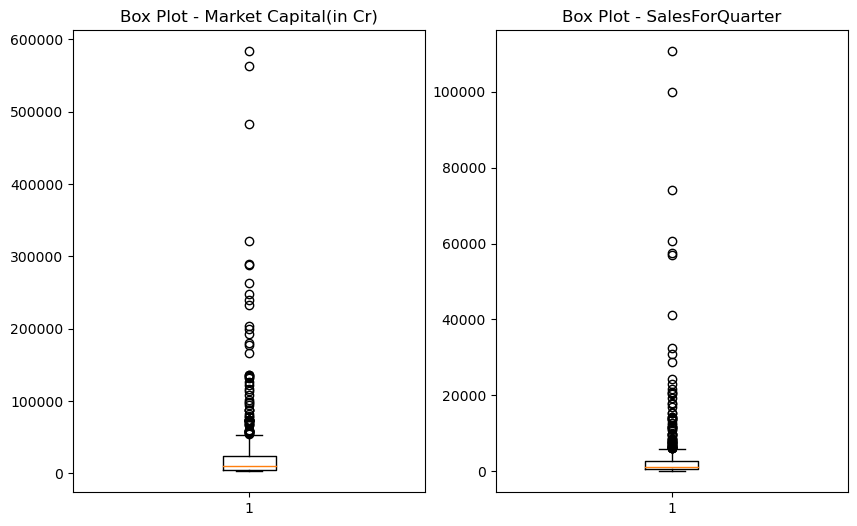

In [232]:
# Create box plots for MarketCapital and SalesForQuarter columns
plt.figure(figsize=(10, 6))

# Box plot for MarketCapital
plt.subplot(1, 2, 1)
plt.boxplot(df['Market Capital(in Cr)'])
plt.title('Box Plot - Market Capital(in Cr)')

# Box plot for SalesForQuarter
plt.subplot(1, 2, 2)
plt.boxplot(df['Quarterly Sales(in Cr)'])
plt.title('Box Plot - SalesForQuarter')

plt.show()

Here Outliers in market capitalization denotes the distribution of companies in terms of size and in sales revenue helps in identifying 'companies with exceptional sales performance. Removing them may obscure important insights or patterns in the data. So it may be more appropriate to analyze the data with outliers included.

In [233]:
# Scatter plot

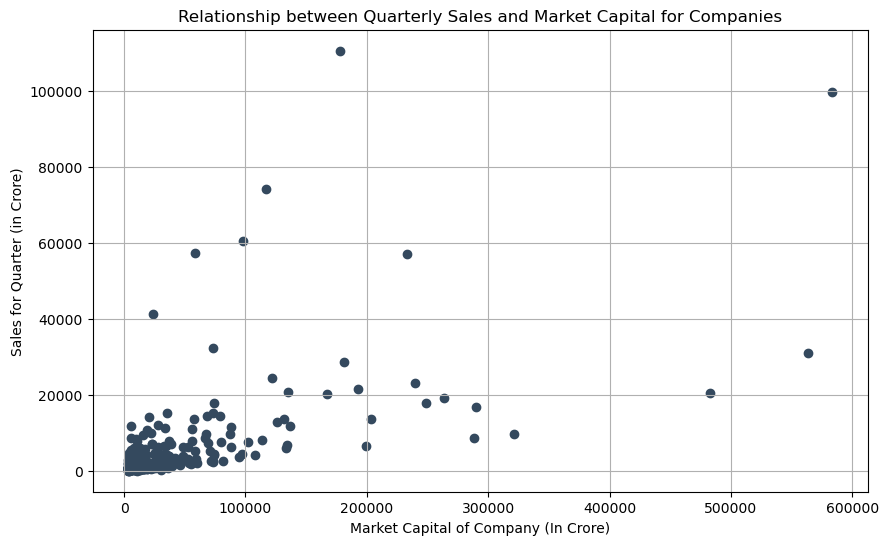

In [234]:
plt.figure(figsize = (10,6))
plt.scatter(df['Market Capital(in Cr)'], df['Quarterly Sales(in Cr)'], color='#34495E')
plt.xlabel("Market Capital of Company (In Crore)")
plt.ylabel("Sales for Quarter (in Crore)")
plt.title("Relationship between Quarterly Sales and Market Capital for Companies")
plt.grid(True)
plt.show()

**Inference :**

- Positive Correlation: There appears to be a positive correlation between market capitalization and sales. As market capitalization increases, so does the sales revenue.

- Outliers: The scattered data points in the upper right quadrant represent outliers—companies with exceptionally high market capitalization and sales. These outliers could be large corporations or successful startups.

- Business Strategy: Companies can use this information to formulate business strategies. For instance, a company with low market capitalization might focus on growth to increase sales and market value.

- Risk Assessment: Investors and analysts can assess risk based on the position of a company’s data point. High market capitalization doesn’t always guarantee high sales, and vice versa.

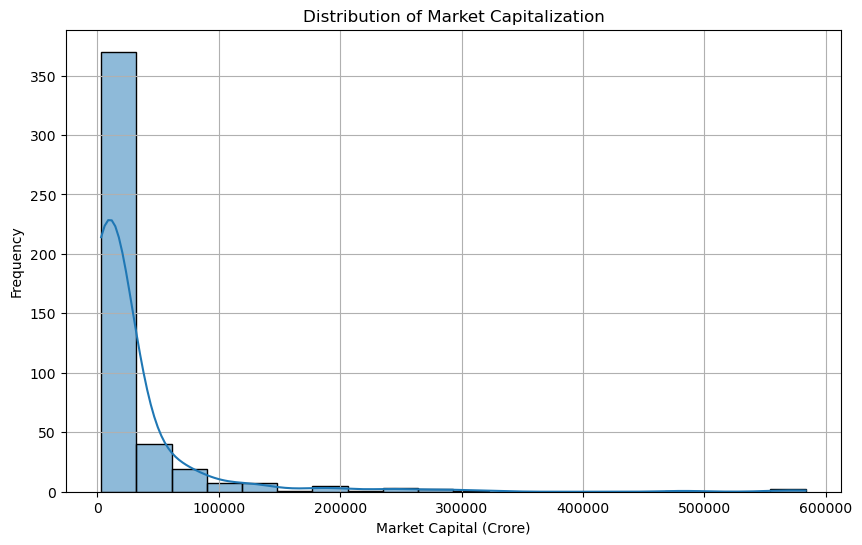

In [235]:


# Distribution of market capitalization
plt.figure(figsize=(10, 6))
sns.histplot(df['Market Capital(in Cr)'], bins=20, kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capital (Crore)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Interpretation:
- The distribution suggests that the majority of companies fall into the lower market capitalization range.
- Only a small percentage of companies have a substantial market capitalization.


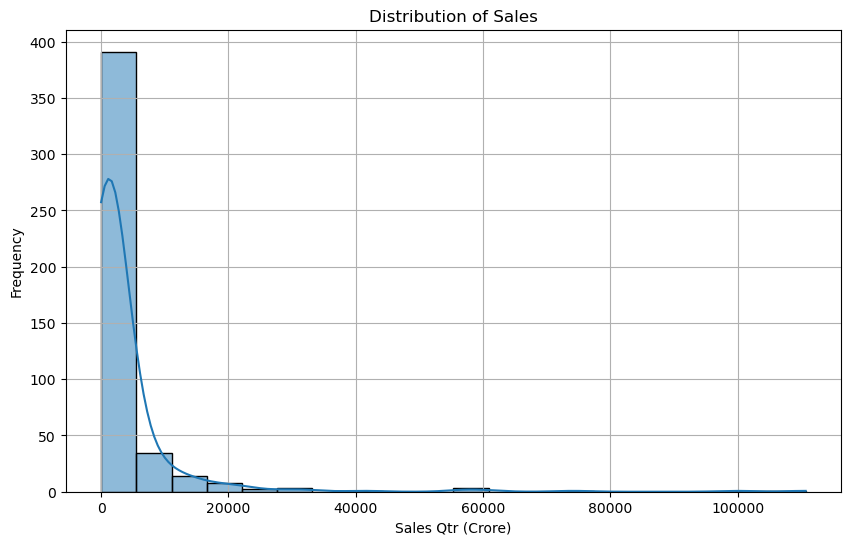

In [236]:

# Distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Quarterly Sales(in Cr)'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales Qtr (Crore)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Interpretation:
- Higher sales figures are less common than lower ones.
- Most data points likely fall within the lower sales range, with fewer instances of exceptionally high sales.

## Largest and Smallest 10 companies by Market Capital

In [237]:
Sorted_df_marketcap = df.sort_values(by="Market Capital(in Cr)", ascending = False)

In [238]:
Sorted_df_marketcap[["Name", "Market Capital(in Cr)"]]

,Name,Market Capital(in Cr)
0,Reliance Inds.,583436.72
1,TCS,563709.84
2,HDFC Bank,482953.59
3,ITC,320985.27
4,H D F C,289497.37
...,...,...
482,Prime Focus,3031.50
483,Lak. Vilas Bank,3029.57
484,NOCIL,3026.26
485,Orient Cement,3024.32


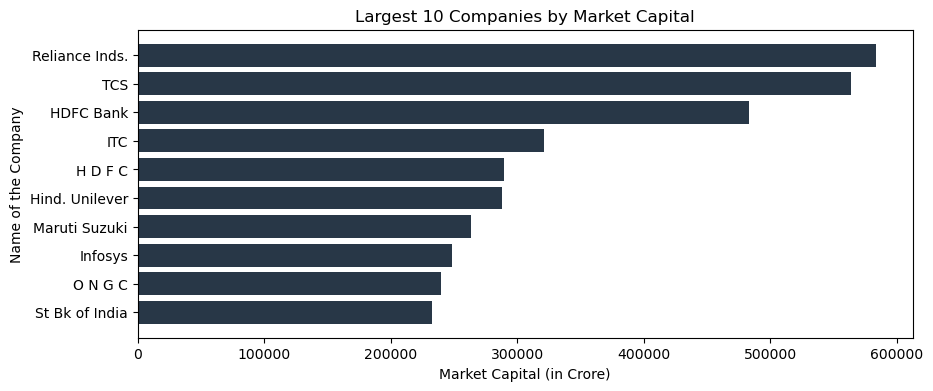

In [239]:
plt.figure(figsize=(10, 4))
plt.barh(Sorted_df_marketcap["Name"][:10], Sorted_df_marketcap["Market Capital(in Cr)"][:10], color='#283747'  )
# plt.barh(Sorted_df_marketcap["Name"][-10:], Sorted_df_marketcap["Market Capital(in Cr)"][-10:], color='#6C3483'  )
plt.xlabel("Market Capital (in Crore)")
plt.ylabel("Name of the Company")
plt.title("Largest 10 Companies by Market Capital")
plt.gca().invert_yaxis()
plt.show()


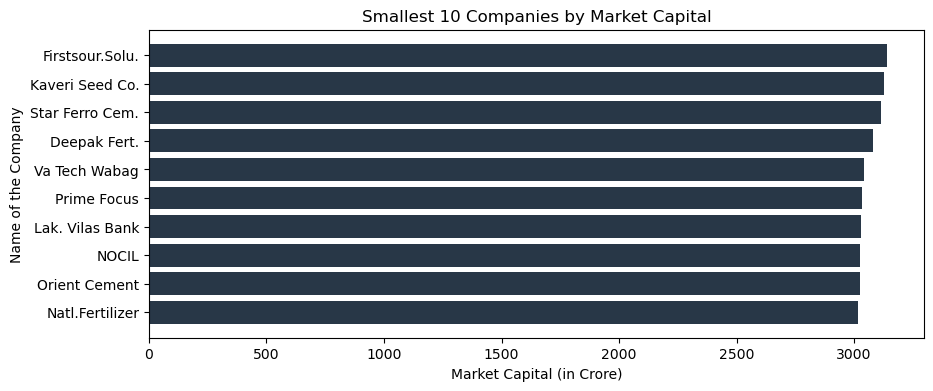

In [240]:
plt.figure(figsize=(10, 4))
# plt.barh(Sorted_df_marketcap["Name"][:10], Sorted_df_marketcap["Market Capital(in Cr)"][:10], color='#283747'  )
plt.barh(Sorted_df_marketcap["Name"][-10:], Sorted_df_marketcap["Market Capital(in Cr)"][-10:], color='#283747'  )
plt.xlabel("Market Capital (in Crore)")
plt.ylabel("Name of the Company")
plt.title("Smallest 10 Companies by Market Capital")
plt.gca().invert_yaxis()
plt.show()


## Largest and Smallest 10 companies by Quarterly Sales

In [241]:
Sorted_df_Qtrsales = df.sort_values(by="Quarterly Sales(in Cr)", ascending = False)

In [242]:
Sorted_df_Qtrsales[["Name","Quarterly Sales(in Cr)"]]

,Name,Quarterly Sales(in Cr)
14,I O C L,110666.93
0,Reliance Inds.,99810.00
23,Tata Motors,74156.07
27,B P C L,60616.36
54,H P C L,57474.25
...,...,...
422,Multi Comm. Exc.,60.97
467,Central Dep. Ser,47.24
382,Tata Inv.Corpn.,47.02
228,SPARC,19.42


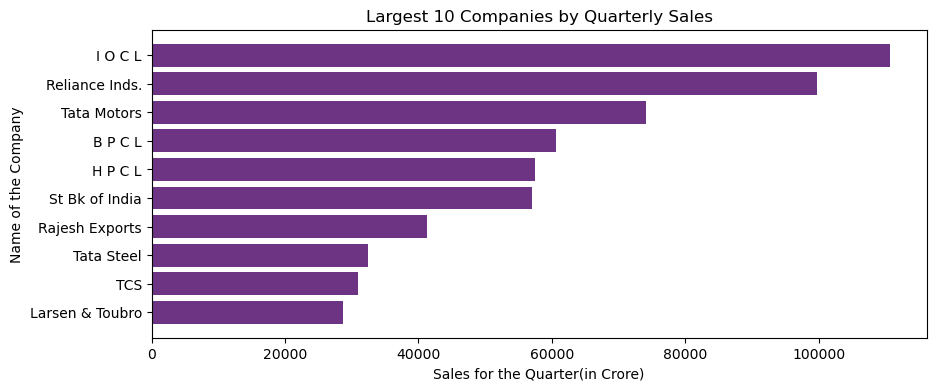

In [243]:
plt.figure(figsize=(10, 4))
plt.barh(Sorted_df_Qtrsales["Name"][:10], Sorted_df_Qtrsales["Quarterly Sales(in Cr)"][:10], color='#6C3483'  )
# plt.barh(Sorted_df_Qtrsales["Name"][-10:], Sorted_df_Qtrsales["Quarterly Sales(in Cr)"][-10:], color='#6C3483'  )
plt.xlabel("Sales for the Quarter(in Crore)")
plt.ylabel("Name of the Company")
plt.title("Largest 10 Companies by Quarterly Sales")
plt.gca().invert_yaxis()
plt.show()


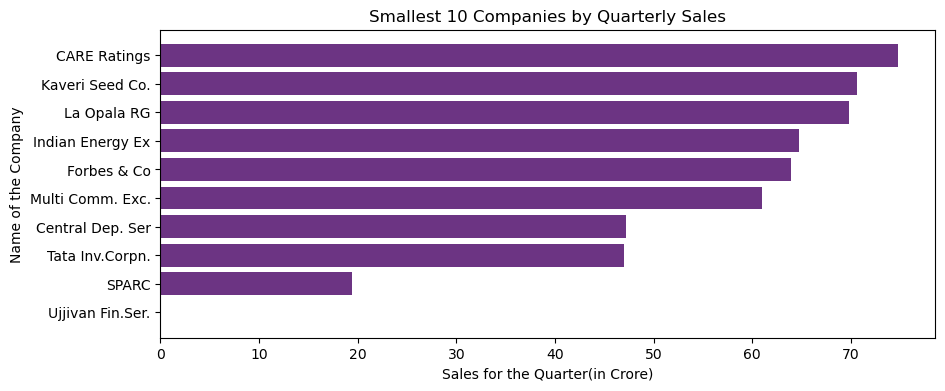

In [244]:
plt.figure(figsize=(10, 4))
plt.barh(Sorted_df_Qtrsales["Name"][-10:], Sorted_df_Qtrsales["Quarterly Sales(in Cr)"][-10:], color='#6C3483'  )
plt.xlabel("Sales for the Quarter(in Crore)")
plt.ylabel("Name of the Company")
plt.title("Smallest 10 Companies by Quarterly Sales")
plt.gca().invert_yaxis()
plt.show()


**Sales Efficiency Ratio (SER)**

- **The Sales Efficiency Ratio** (also known as the Sales Efficiency Magic Number or the Sales Efficiency Index) measures how efficiently a company utilizes its sales and marketing expenses to generate new revenue. It provides insights into the effectiveness of a company’s sales process and its ability to convert marketing efforts into actual sales.

<br>- The real Formula for Sales Efficiency Ratio is :

**`Sales Efficiency Ratio (SER) = New Revenue Generated / Sales and Marketing Expenses.`**

Where,
- **New Revenue Generated**: This represents the additional revenue generated during a specific period (e.g., a quarter or a year).
- **Sales and Marketing Expenses**: These are the costs incurred by the company for sales and marketing activities, including salaries, advertising, promotions, and other related expenses.


**Point to note:**
- Here we are using **(Market Capital / Quarterly Sales)**, which is not a conventional financial metric. However, our intention is to create a metric that represents the efficiency of sales in generating market capitalization, so i think it's okay to define and calculate it in this way.


**Importance :**

- This calculated metric indicates how efficiently a company's sales are generating market capitalization.
- A higher value could suggest that the company's sales are highly valued by the market relative to the revenue generated, which could indicate strong investor confidence or expectations for future growth.
- Companies with a high SER are better at converting their marketing efforts into tangible results.


## Largest and Smallest 10 Company as per Sales Efficiency Ratio 

In [245]:

df['Sales Efficiency Ratio'] = (df['Market Capital(in Cr)'] / df['Quarterly Sales(in Cr)']).round(2)

In [246]:
df

,Name,Market Capital(in Cr),Quarterly Sales(in Cr),Market Cap to Sales Ratio,Sales Efficiency Ratio
0,Reliance Inds.,583436.72,99810.00,5.845474,5.85
1,TCS,563709.84,30904.00,18.240676,18.24
2,HDFC Bank,482953.59,20581.27,23.465685,23.47
3,ITC,320985.27,9772.02,32.847382,32.85
4,H D F C,289497.37,16840.51,17.190535,17.19
...,...,...,...,...,...
482,Prime Focus,3031.50,609.61,4.972851,4.97
483,Lak. Vilas Bank,3029.57,790.17,3.834074,3.83
484,NOCIL,3026.26,249.27,12.140490,12.14
485,Orient Cement,3024.32,511.53,5.912302,5.91


In [247]:
SER_sorted = df.sort_values(by='Sales Efficiency Ratio', ascending = False)
SER_sorted

,Name,Market Capital(in Cr),Quarterly Sales(in Cr),Market Cap to Sales Ratio,Sales Efficiency Ratio
393,Ujjivan Fin.Ser.,4293.42,0.00,inf,inf
228,SPARC,10755.13,19.42,553.817199,553.82
95,Bajaj Holdings,30305.94,317.85,95.346673,95.35
382,Tata Inv.Corpn.,4401.66,47.02,93.612505,93.61
373,Indian Energy Ex,4595.70,64.75,70.976062,70.98
...,...,...,...,...,...
444,Oriental Bank,3674.60,4262.08,0.862161,0.86
441,Corporation Bank,3716.46,4387.85,0.846989,0.85
334,C P C L,5427.82,8587.17,0.632085,0.63
122,Rajesh Exports,23495.54,41304.84,0.568833,0.57


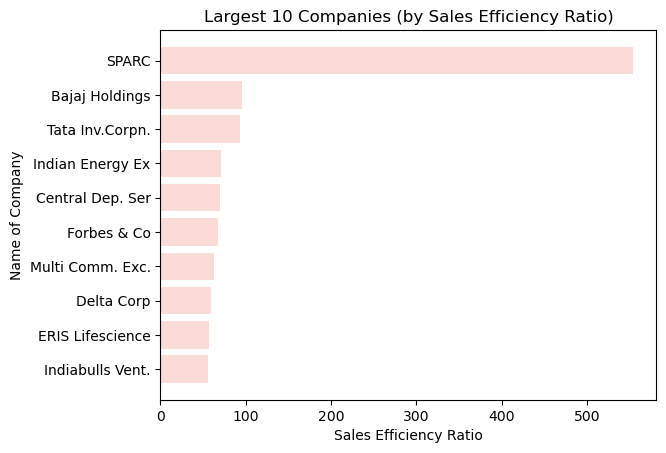

In [248]:

plt.barh(SER_sorted['Name'][:11], SER_sorted['Sales Efficiency Ratio'][:11], color = '#FADBD8')
# plt.xticks(SER_sorted['Name'][:10], rotation = 'vertical')
plt.xlabel('Sales Efficiency Ratio')
plt.ylabel('Name of Company')
plt.title('Largest 10 Companies (by Sales Efficiency Ratio)')
plt.gca().invert_yaxis()
plt.show()

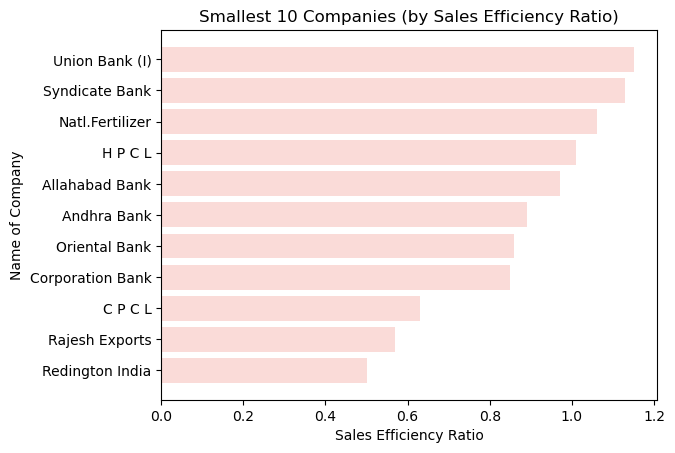

In [249]:

plt.barh(SER_sorted['Name'][-11:], SER_sorted['Sales Efficiency Ratio'][-11:], color = '#FADBD8')
# plt.xticks(SER_sorted['Name'][:10], rotation = 'vertical')
plt.xlabel('Sales Efficiency Ratio')
plt.ylabel('Name of Company')
plt.title('Smallest 10 Companies (by Sales Efficiency Ratio)')
plt.gca().invert_yaxis()
plt.show()